<a href="https://colab.research.google.com/github/sanjufvr/sample_project/blob/main/customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


EDA

In [ ]:
train ='/content/drive/MyDrive/Colab Notebooks/data/Training_data.csv'
train = pd.read_csv(train)
train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,Female,0,No,No,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No
1,7746-AWNQW,Female,0,No,No,28,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.4,No
2,2208-UGTGR,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,4884-LEVMQ,Male,0,Yes,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790,No
4,6682-VCIXC,Female,0,Yes,Yes,43,No,No phone service,DSL,NaN,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.6,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,5649-RXQTV,Male,0,No,No,51,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.00,5038.15,No
5630,3908-MKIMJ,Male,1,Yes,No,68,No,No phone service,DSL,Yes,...,Yes,No,No,No,Two year,Yes,Electronic check,41.95,2965.75,No
5631,4277-BWBML,Male,0,Yes,Yes,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.95,1322.85,No
5632,9110-HSGTV,Female,0,No,No,69,Yes,No,DSL,NaN,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),82.45,5555.3,No


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5465 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5465 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [ ]:
test= '/content/drive/MyDrive/ICT PROJECT DATAS/Testing_data.csv'
test = pd.read_csv(test)
test

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6080-TCMYC,Male,0,Yes,Yes,40,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,81.20,3292.3,No
1,7285-KLOTR,Female,0,Yes,No,12,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Yes,One year,No,Electronic check,78.85,876.75,No
2,7486-KSRVI,Male,0,No,No,43,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Electronic check,100.00,4211.55,Yes
3,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
4,4439-YRNVD,Female,0,No,No,10,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,36.25,374,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,2039-JONDJ,Male,0,No,No,27,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),55.45,1477.65,No
1405,2516-VQRRV,Female,1,No,No,2,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,75.45,158.4,Yes
1406,5570-PTWEH,Female,0,Yes,No,3,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.15,216.75,Yes
1407,1722-LDZJS,Male,0,Yes,Yes,53,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.20,1068.15,No


duplicates


In [ ]:

train.duplicated().sum()

np.int64(0)

In [ ]:
test.duplicated().sum()

np.int64(0)

NULL VALUES

In [ ]:
train.isna().sum()

,0
customerID,0
gender,169
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,169


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1409 non-null   object 
 1   gender            1409 non-null   object 
 2   SeniorCitizen     1409 non-null   int64  
 3   Partner           1409 non-null   object 
 4   Dependents        1409 non-null   object 
 5   tenure            1409 non-null   int64  
 6   PhoneService      1409 non-null   object 
 7   MultipleLines     1409 non-null   object 
 8   InternetService   1409 non-null   object 
 9   OnlineSecurity    1409 non-null   object 
 10  OnlineBackup      1409 non-null   object 
 11  DeviceProtection  1409 non-null   object 
 12  TechSupport       1409 non-null   object 
 13  StreamingTV       1409 non-null   object 
 14  StreamingMovies   1409 non-null   object 
 15  Contract          1409 non-null   object 
 16  PaperlessBilling  1409 non-null   object 


In [ ]:
train.isna().sum()

,0
customerID,0
gender,169
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,169


FILLING OF NULL VALUES

In [ ]:
mode_value = train['gender'].mode()[0]
train['gender'] = train['gender'].fillna(mode_value)

In [ ]:
mode_value = train['OnlineSecurity'].mode()[0]
train['OnlineSecurity'] = train['OnlineSecurity'].fillna(mode_value)

In [ ]:
median_value = train['MonthlyCharges'].median()
train['MonthlyCharges'].fillna(median_value, inplace=True)

/tmp/ipython-input-1613696060.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['MonthlyCharges'].fillna(median_value, inplace=True)


In [ ]:
mode_value = train['TotalCharges'].mode()[0]
train['TotalCharges'] = train['TotalCharges'].fillna(mode_value)

In [ ]:
train.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


outlier detection

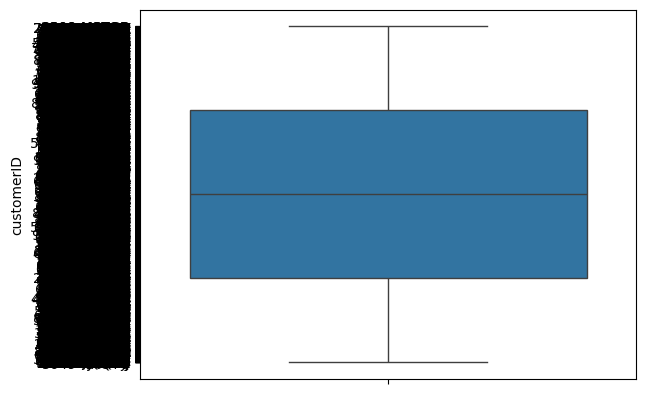

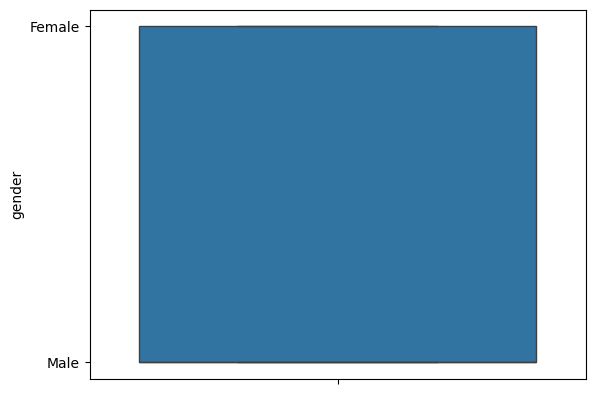

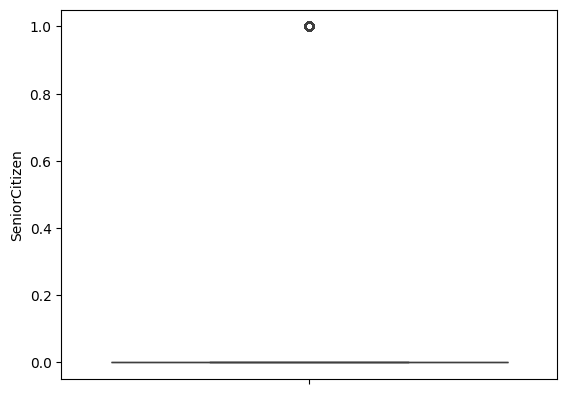

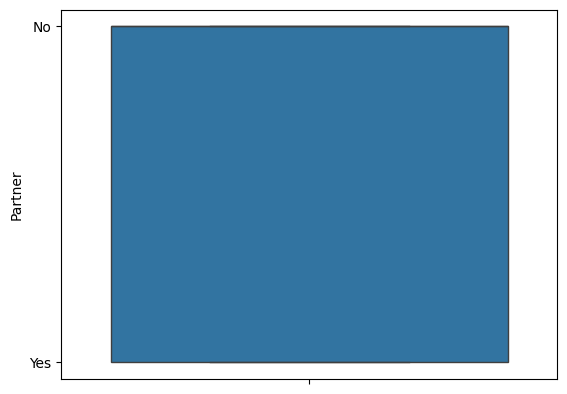

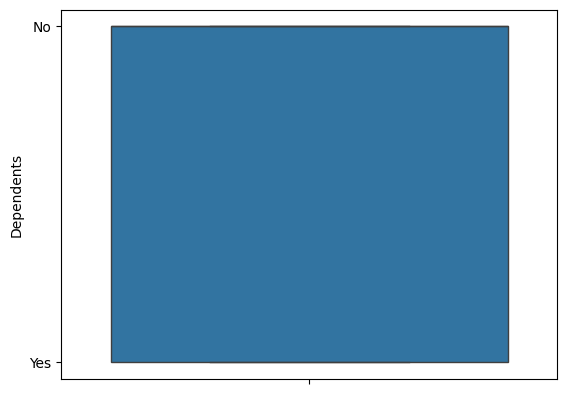

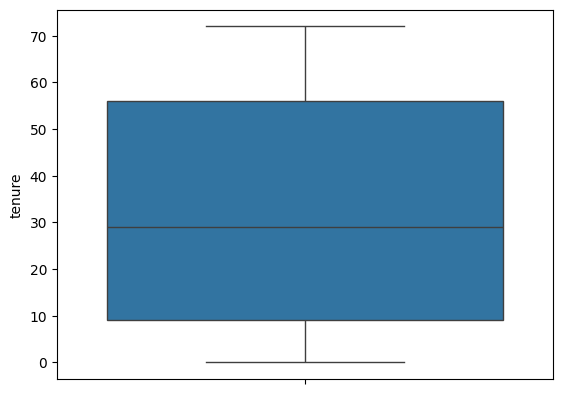

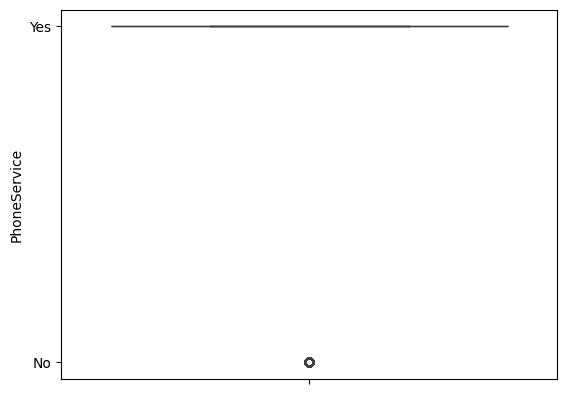

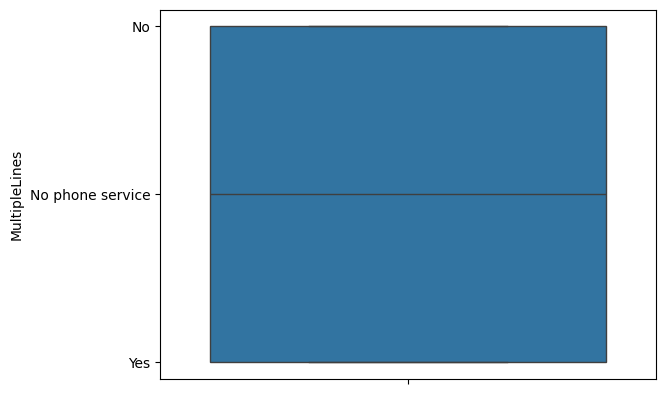

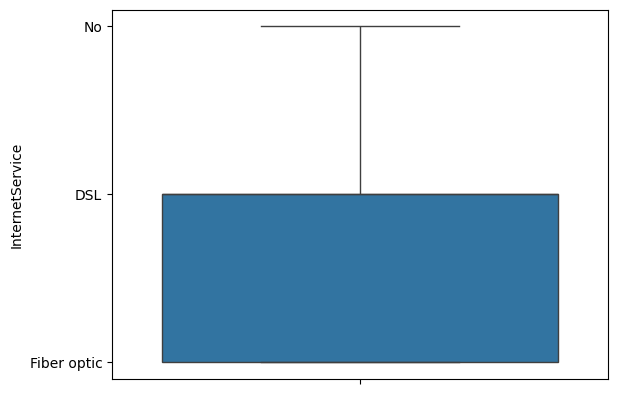

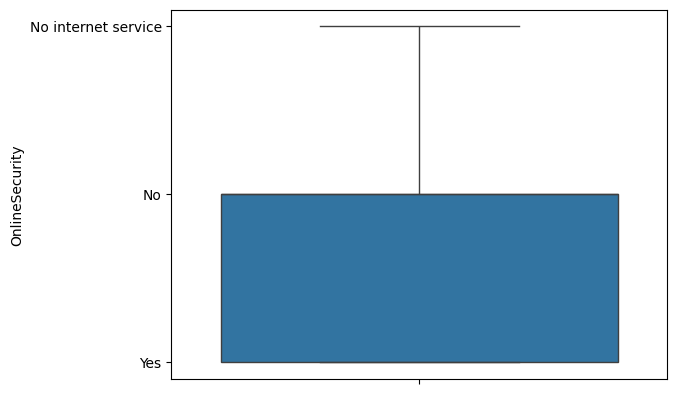

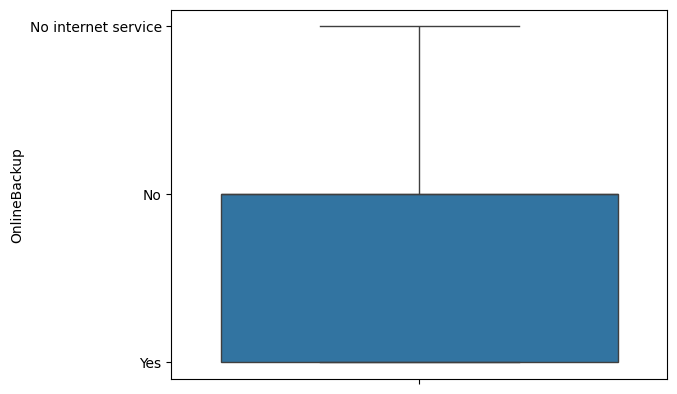

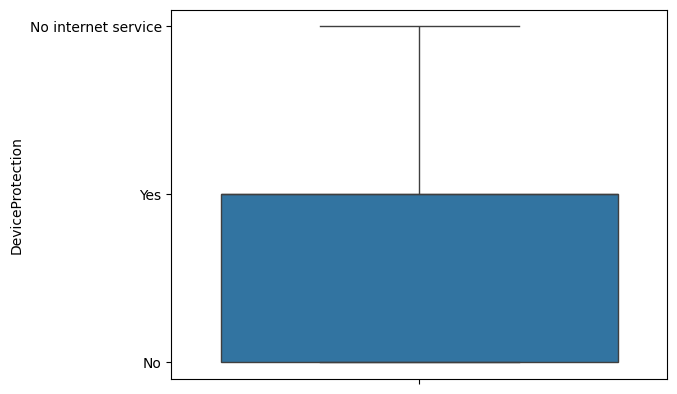

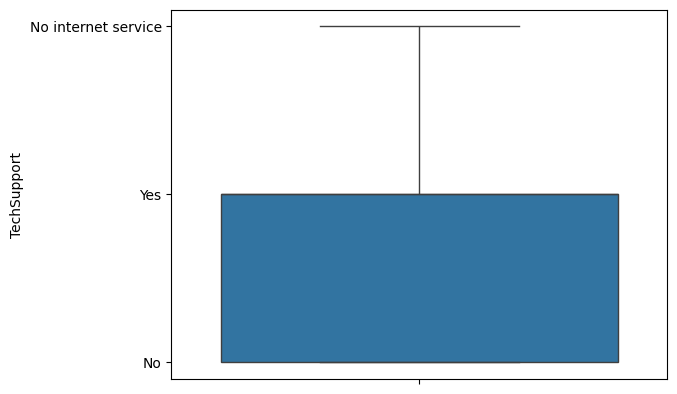

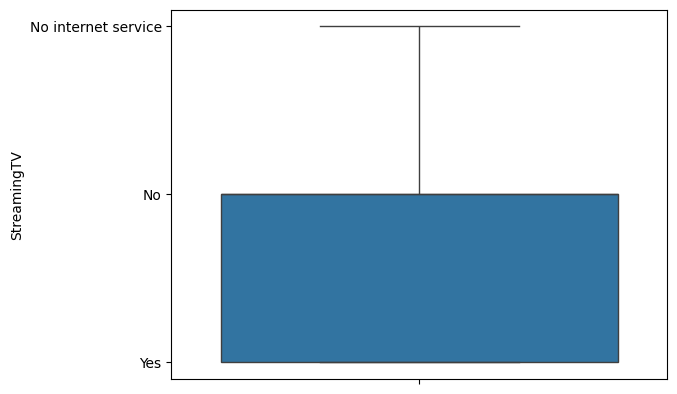

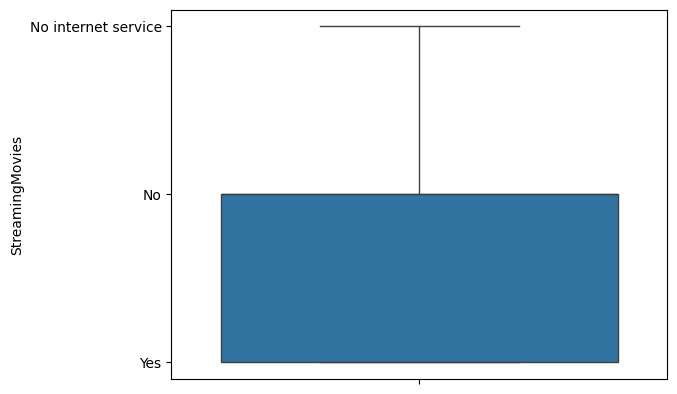

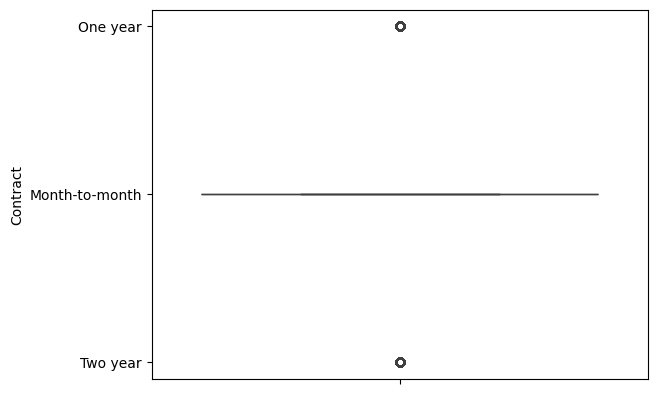

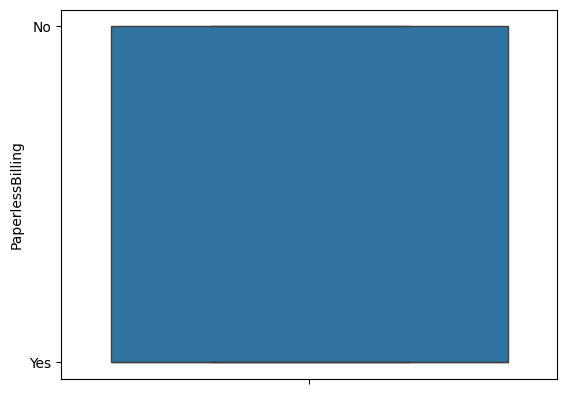

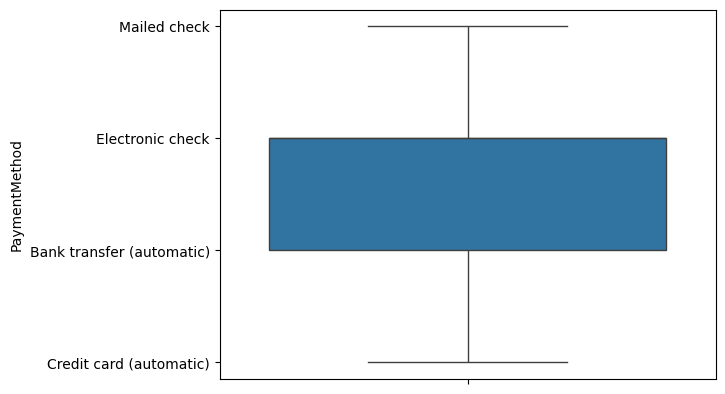

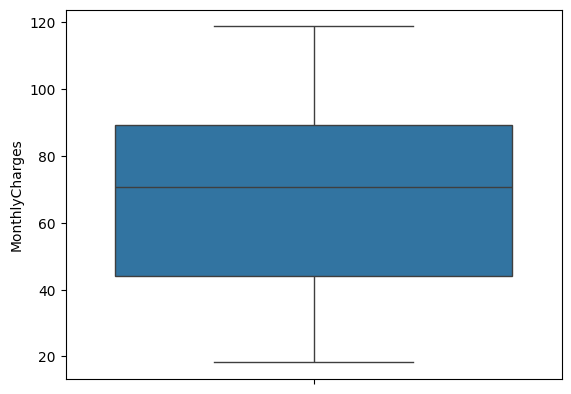

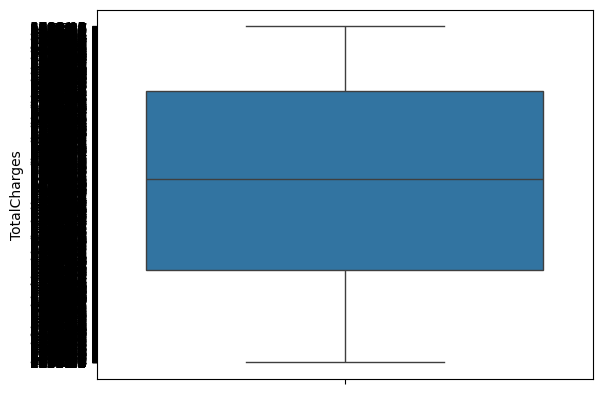

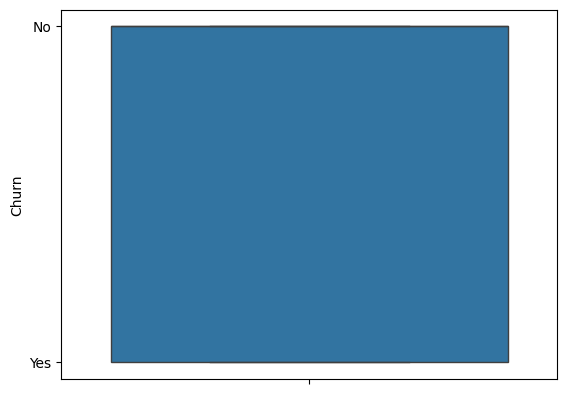

In [ ]:
for col in test.columns:
  sns.boxplot(train[col])
  plt.title
  plt.show()

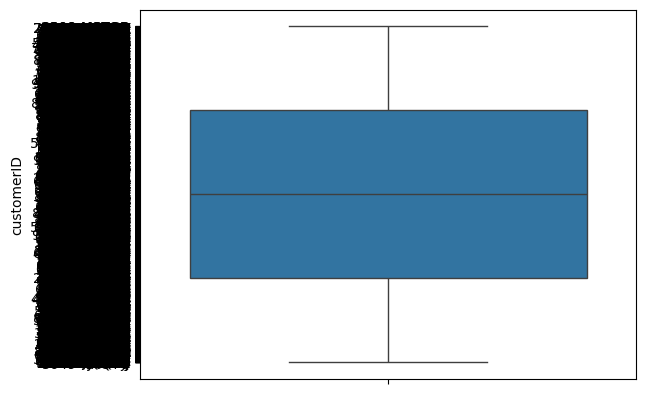

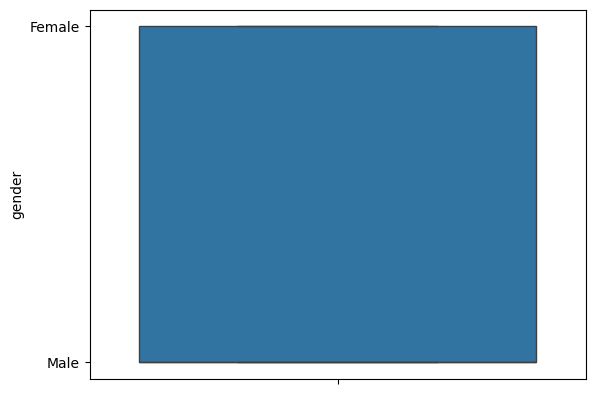

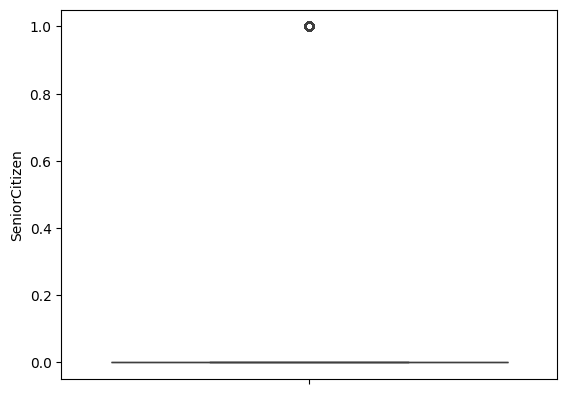

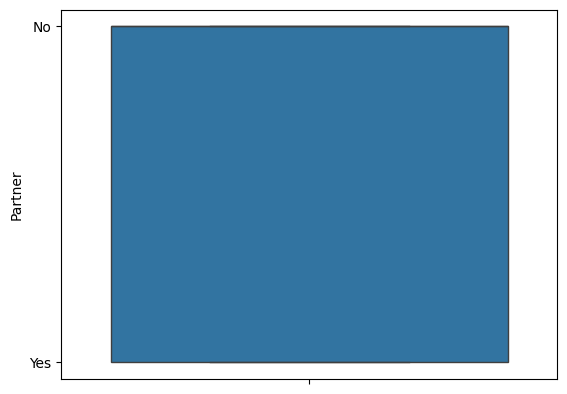

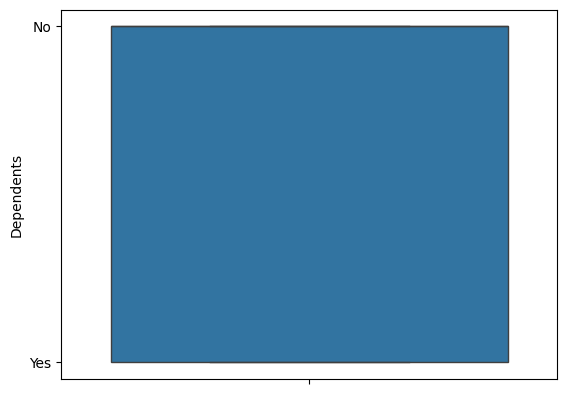

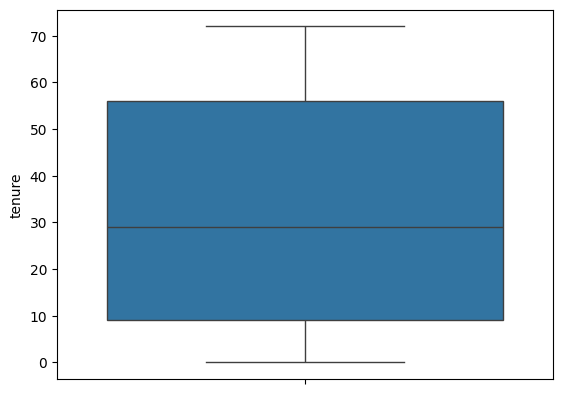

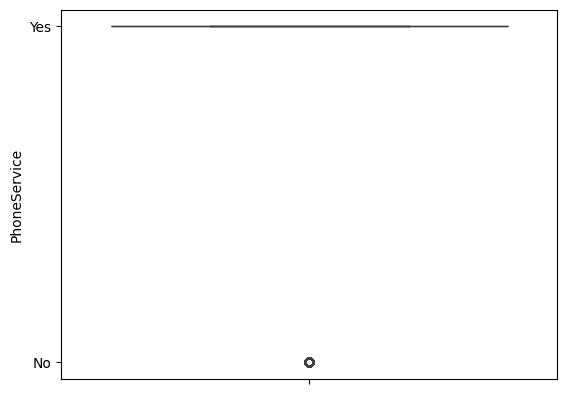

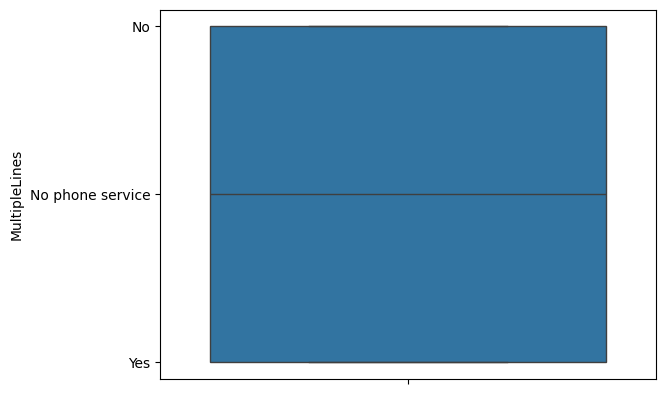

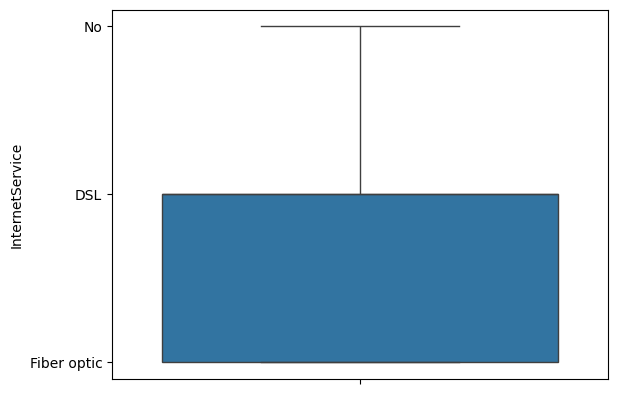

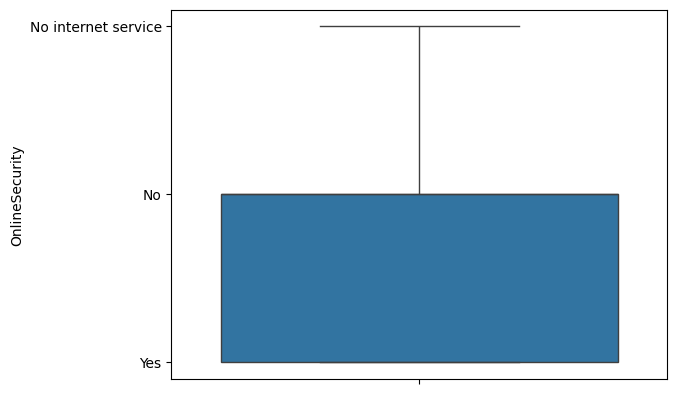

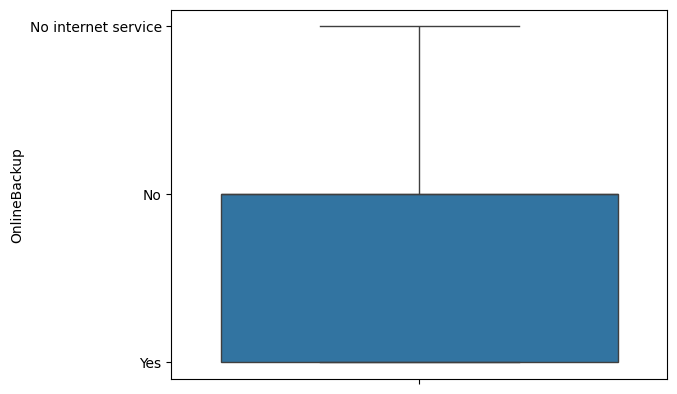

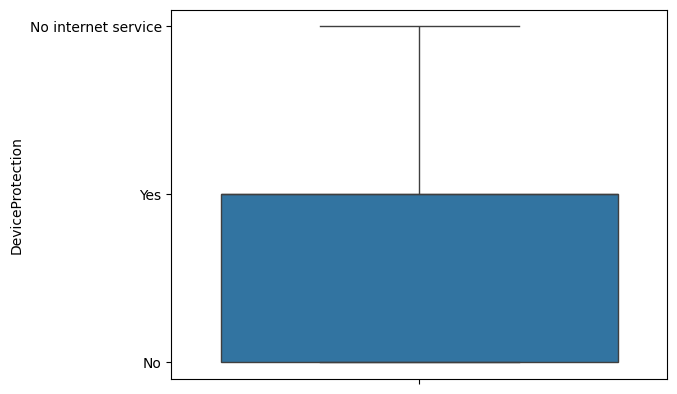

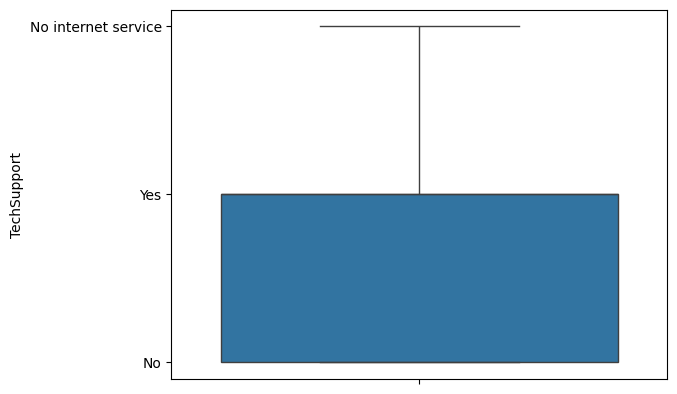

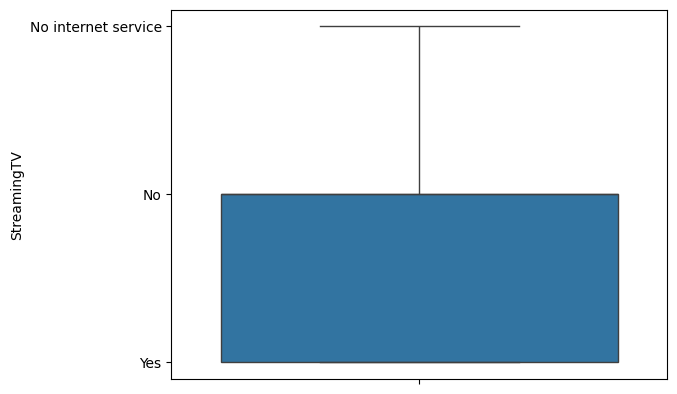

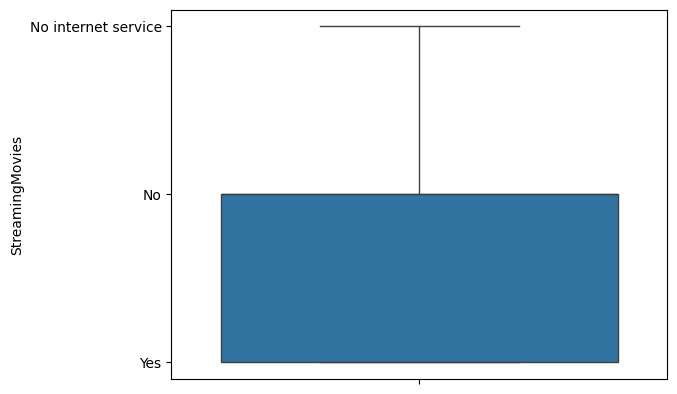

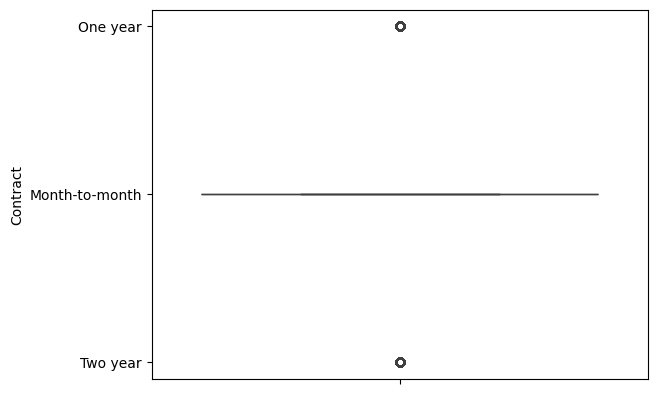

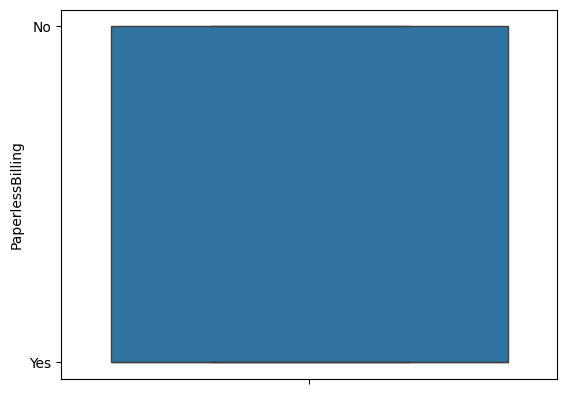

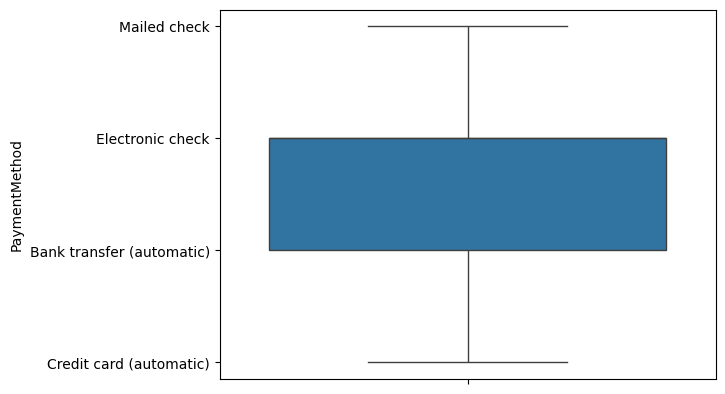

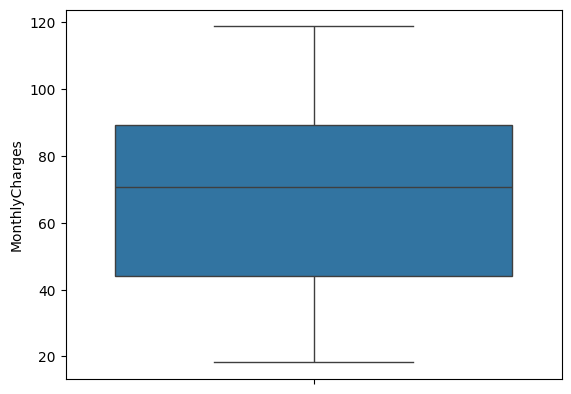

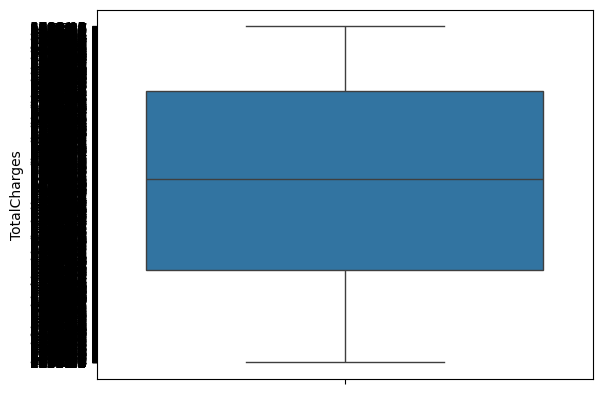

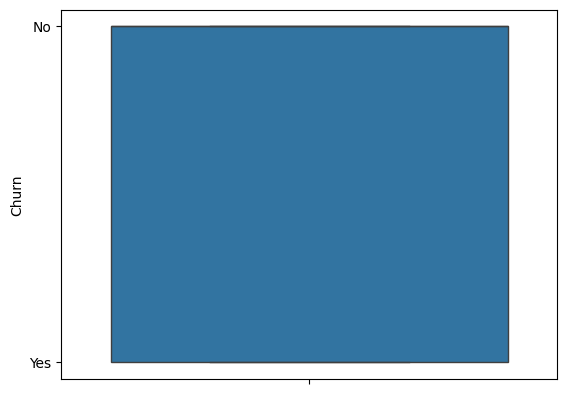

In [ ]:
for col in train.columns:
  sns.boxplot(train[col])
  plt.title
  plt.show()

visualize corelation

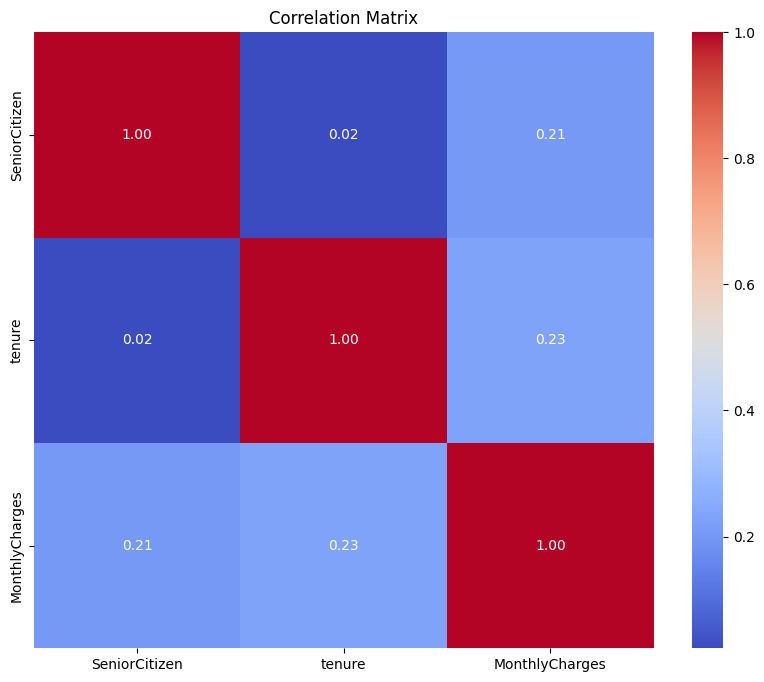

In [ ]:
corr = train.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

 visualizing distribution

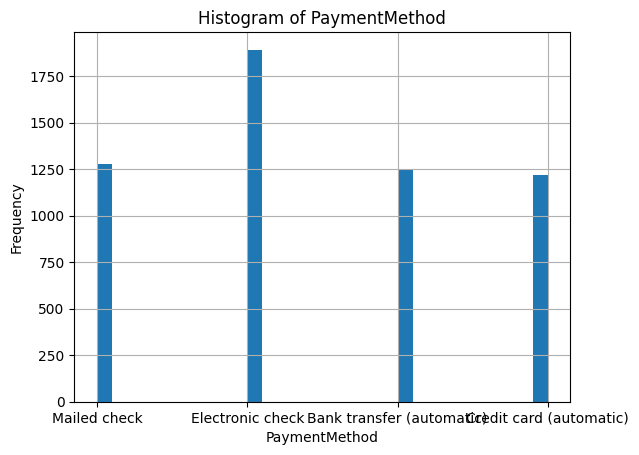

In [ ]:
train['PaymentMethod'].hist(bins=30)
plt.title('Histogram of PaymentMethod')
plt.xlabel('PaymentMethod')
plt.ylabel('Frequency')
plt.show()


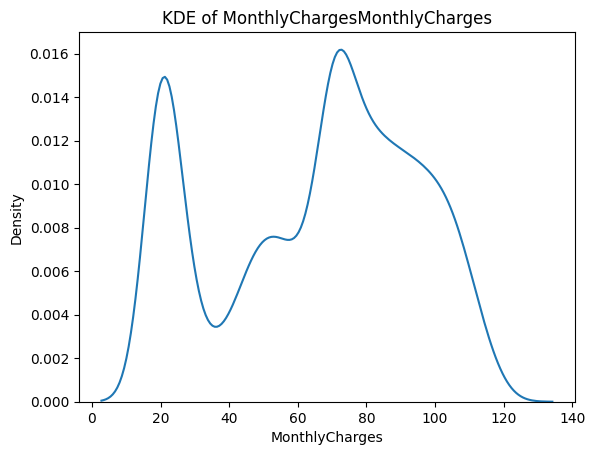

In [ ]:
sns.kdeplot(train ['MonthlyCharges'].dropna())
plt.title('KDE of MonthlyChargesMonthlyCharges')
plt.show()

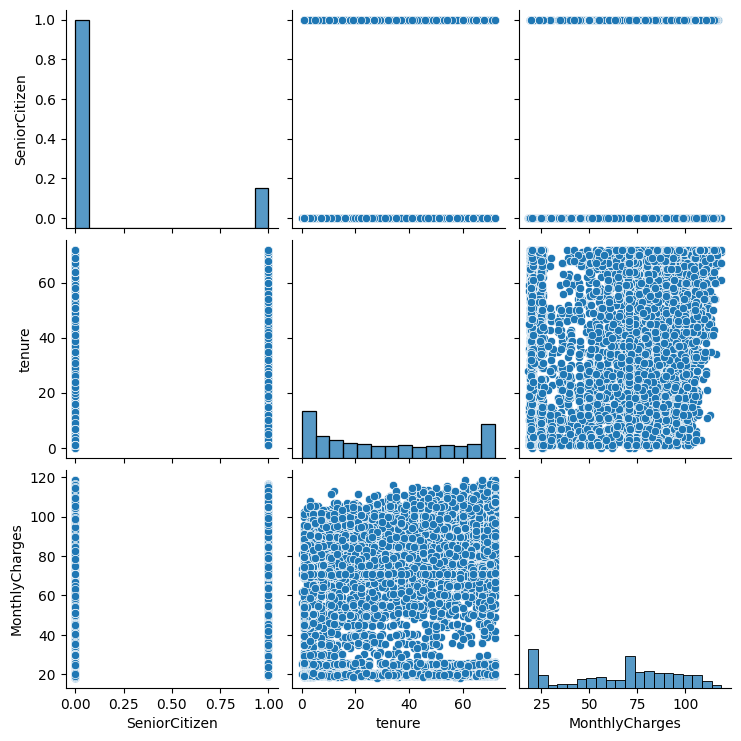

In [ ]:
sns.pairplot(train[['SeniorCitizen','tenure',
   'MonthlyCharges',
   'TotalCharges']])
plt.show()


categorical column to numerical column

In [ ]:
train['TotalCharges'] = pd.to_numeric(train['TotalCharges'], errors='coerce')


In [ ]:
test['TotalCharges'] = pd.to_numeric(train['TotalCharges'], errors='coerce')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1409 non-null   object 
 1   gender            1409 non-null   object 
 2   SeniorCitizen     1409 non-null   int64  
 3   Partner           1409 non-null   object 
 4   Dependents        1409 non-null   object 
 5   tenure            1409 non-null   int64  
 6   PhoneService      1409 non-null   object 
 7   MultipleLines     1409 non-null   object 
 8   InternetService   1409 non-null   object 
 9   OnlineSecurity    1409 non-null   object 
 10  OnlineBackup      1409 non-null   object 
 11  DeviceProtection  1409 non-null   object 
 12  TechSupport       1409 non-null   object 
 13  StreamingTV       1409 non-null   object 
 14  StreamingMovies   1409 non-null   object 
 15  Contract          1409 non-null   object 
 16  PaperlessBilling  1409 non-null   object 


feature engineering

In [ ]:
# Convert Contract type to numeric (if needed)
train['Contract'] = train['Contract'].map({'Month-to-month': 1, 'One year': 12, 'Two year': 24})

# Create interaction feature
train['Tenure_Contract'] = train['tenure'] * train['Contract']


In [ ]:
train['CLV'] = train['tenure'] * train['MonthlyCharges']


In [ ]:
#Convert Contract type to numeric (if needed)
test['Contract'] = test['Contract'].map({'Month-to-month': 1, 'One year': 12, 'Two year': 24})

# Create interaction feature
test['Tenure_Contract'] = test['tenure'] * test['Contract']


In [ ]:
test['CLV'] = test['tenure'] * test['MonthlyCharges']

pre processing

**SCALING**

In [ ]:
min_scale = MinMaxScaler()
num_cols = ['SeniorCitizen','tenure',
   'MonthlyCharges',
   'TotalCharges']
train[num_cols] = min_scale.fit_transform(train[num_cols])
train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Contract,CLV
0,9509-MPYOD,Female,0.0,No,No,0.486111,Yes,No,No,No internet service,...,No internet service,No internet service,12,No,Mailed check,0.024876,0.078653,No,420,726.25
1,7746-AWNQW,Female,0.0,No,No,0.388889,No,No phone service,DSL,No,...,No,No,1,Yes,Mailed check,0.174129,0.108765,No,28,1001.00
2,2208-UGTGR,Male,0.0,No,No,0.777778,Yes,Yes,Fiber optic,No,...,Yes,Yes,1,No,Electronic check,0.799502,0.641845,No,56,5521.60
3,4884-LEVMQ,Male,0.0,Yes,No,0.541667,Yes,No,No,No internet service,...,No internet service,No internet service,24,Yes,Bank transfer (automatic),0.021891,0.088986,No,936,797.55
4,6682-VCIXC,Female,0.0,Yes,Yes,0.597222,No,No phone service,DSL,No,...,Yes,No,12,Yes,Bank transfer (automatic),0.328358,0.246107,No,516,2203.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,5649-RXQTV,Male,0.0,No,No,0.708333,Yes,No,Fiber optic,No,...,Yes,Yes,1,Yes,Electronic check,0.803483,0.579198,No,51,5049.00
5630,3908-MKIMJ,Male,1.0,Yes,No,0.944444,No,No phone service,DSL,Yes,...,No,No,24,Yes,Electronic check,0.235821,0.340055,No,1632,2852.60
5631,4277-BWBML,Male,0.0,Yes,Yes,1.000000,Yes,No,No,No internet service,...,No internet service,No internet service,24,No,Bank transfer (automatic),0.016915,0.150474,No,1728,1436.40
5632,9110-HSGTV,Female,0.0,No,No,0.958333,Yes,No,DSL,No,...,Yes,Yes,24,Yes,Credit card (automatic),0.638806,0.638874,No,1656,5689.05


In [ ]:
min_scale = MinMaxScaler()
num_cols = ['SeniorCitizen','tenure',
   'MonthlyCharges',
   'TotalCharges']
test[num_cols] = min_scale.fit_transform(test[num_cols])
test

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Contract,CLV
0,6080-TCMYC,Male,0.0,Yes,Yes,0.555556,Yes,Yes,Fiber optic,No,...,No,No,1,Yes,Electronic check,0.625626,0.080371,No,40,3248.00
1,7285-KLOTR,Female,0.0,Yes,No,0.166667,Yes,Yes,DSL,Yes,...,Yes,Yes,12,No,Electronic check,0.602102,0.111152,No,144,946.20
2,7486-KSRVI,Male,0.0,No,No,0.597222,Yes,Yes,Fiber optic,No,...,Yes,Yes,12,Yes,Electronic check,0.813814,0.656076,Yes,516,4300.00
3,9924-JPRMC,Male,0.0,No,No,1.000000,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,24,Yes,Electronic check,0.995996,0.090934,No,1728,8510.40
4,4439-YRNVD,Female,0.0,No,No,0.138889,No,No phone service,DSL,No,...,No,No,1,No,Electronic check,0.175676,0.251545,No,10,362.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,2039-JONDJ,Male,0.0,No,No,0.375000,Yes,No,DSL,Yes,...,No,No,12,No,Bank transfer (automatic),0.367868,0.415448,No,324,1497.15
1405,2516-VQRRV,Female,1.0,No,No,0.027778,Yes,Yes,Fiber optic,No,...,No,No,1,Yes,Mailed check,0.568068,0.110238,Yes,2,150.90
1406,5570-PTWEH,Female,0.0,Yes,No,0.041667,Yes,Yes,Fiber optic,No,...,No,No,1,Yes,Credit card (automatic),0.565065,0.098613,Yes,3,225.45
1407,1722-LDZJS,Male,0.0,Yes,Yes,0.736111,Yes,No,No,No internet service,...,No internet service,No internet service,12,No,Credit card (automatic),0.015015,0.754005,No,636,1070.60


**MAPING OF YES AND NO TO 1 AND 0**

In [ ]:
train['Partner'] = train['Partner'].str.lower().map({'yes': 1, 'no': 0})
train['Dependents'] = train['Dependents'].str.lower().map({'yes': 1, 'no': 0})
train['PhoneService'] = train['PhoneService'].str.lower().map({'yes': 1, 'no': 0})
train['MultipleLines'] = train['MultipleLines'].str.lower().map({'yes': 1, 'no': 0})
train['OnlineSecurity'] = train['OnlineSecurity'].str.lower().map({'yes': 1, 'no': 0})
train['OnlineBackup'] = train['OnlineBackup'].str.lower().map({'yes': 1, 'no': 0})
train['DeviceProtection'] = train['DeviceProtection'].str.lower().map({'yes': 1, 'no': 0})
train['TechSupport'] = train['TechSupport'].str.lower().map({'yes': 1, 'no': 0})
train['StreamingTV'] = train['StreamingTV'].str.lower().map({'yes': 1, 'no': 0})
train['StreamingMovies'] = train['StreamingMovies'].str.lower().map({'yes': 1, 'no': 0})
train['PaperlessBilling'] = train['PaperlessBilling'].str.lower().map({'yes': 1, 'no': 0})


In [ ]:
train['Churn'] = train['Churn'].str.lower().map({'yes': 1, 'no':0})

In [ ]:
train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Contract,CLV
0,9509-MPYOD,Female,0.0,0,0,0.486111,1,0.0,No,NaN,...,NaN,NaN,12,0,Mailed check,0.024876,0.078653,0,420,726.25
1,7746-AWNQW,Female,0.0,0,0,0.388889,0,NaN,DSL,0.0,...,0.0,0.0,1,1,Mailed check,0.174129,0.108765,0,28,1001.00
2,2208-UGTGR,Male,0.0,0,0,0.777778,1,1.0,Fiber optic,0.0,...,1.0,1.0,1,0,Electronic check,0.799502,0.641845,0,56,5521.60
3,4884-LEVMQ,Male,0.0,1,0,0.541667,1,0.0,No,NaN,...,NaN,NaN,24,1,Bank transfer (automatic),0.021891,0.088986,0,936,797.55
4,6682-VCIXC,Female,0.0,1,1,0.597222,0,NaN,DSL,0.0,...,1.0,0.0,12,1,Bank transfer (automatic),0.328358,0.246107,0,516,2203.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,5649-RXQTV,Male,0.0,0,0,0.708333,1,0.0,Fiber optic,0.0,...,1.0,1.0,1,1,Electronic check,0.803483,0.579198,0,51,5049.00
5630,3908-MKIMJ,Male,1.0,1,0,0.944444,0,NaN,DSL,1.0,...,0.0,0.0,24,1,Electronic check,0.235821,0.340055,0,1632,2852.60
5631,4277-BWBML,Male,0.0,1,1,1.000000,1,0.0,No,NaN,...,NaN,NaN,24,0,Bank transfer (automatic),0.016915,0.150474,0,1728,1436.40
5632,9110-HSGTV,Female,0.0,0,0,0.958333,1,0.0,DSL,0.0,...,1.0,1.0,24,1,Credit card (automatic),0.638806,0.638874,0,1656,5689.05


In [ ]:
train.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,553
InternetService,0
OnlineSecurity,1171


In [ ]:
median_value = train['MultipleLines'].median()
train['MultipleLines'].fillna(median_value, inplace=True)

/tmp/ipython-input-2889612822.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['MultipleLines'].fillna(median_value, inplace=True)


In [ ]:
median_value = train['OnlineSecurity'].median()
train['OnlineSecurity'].fillna(median_value, inplace=True)

/tmp/ipython-input-3294117792.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['OnlineSecurity'].fillna(median_value, inplace=True)


In [ ]:
median_value = train['OnlineBackup'].median()
train['OnlineBackup'].fillna(median_value, inplace=True)

/tmp/ipython-input-1306962788.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['OnlineBackup'].fillna(median_value, inplace=True)


In [ ]:
median_value = train['DeviceProtection'].median()
train['DeviceProtection'].fillna(median_value, inplace=True)

/tmp/ipython-input-2898454065.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['DeviceProtection'].fillna(median_value, inplace=True)


In [ ]:
median_value = train['TechSupport'].median()
train['TechSupport'].fillna(median_value, inplace=True)

/tmp/ipython-input-3745477777.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['TechSupport'].fillna(median_value, inplace=True)


In [ ]:
median_value = train['StreamingTV'].median()
train['StreamingTV'].fillna(median_value, inplace=True)

/tmp/ipython-input-27258760.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['StreamingTV'].fillna(median_value, inplace=True)


In [ ]:
median_value = train['StreamingMovies'].median()
train['StreamingMovies'].fillna(median_value, inplace=True)

/tmp/ipython-input-3317933150.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['StreamingMovies'].fillna(median_value, inplace=True)


In [ ]:
median_value = train['TotalCharges'].median()
train['TotalCharges'].fillna(median_value, inplace=True)

/tmp/ipython-input-2575483651.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['TotalCharges'].fillna(median_value, inplace=True)


In [ ]:
train.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
test['Partner'] = test['Partner'].str.lower().map({'yes': 1, 'no': 0})
test['Dependents'] = test['Dependents'].str.lower().map({'yes': 1, 'no': 0})
test['PhoneService'] = test['PhoneService'].str.lower().map({'yes': 1, 'no': 0})
test['MultipleLines'] = test['MultipleLines'].str.lower().map({'yes': 1, 'no': 0})
test['OnlineSecurity'] = test['OnlineSecurity'].str.lower().map({'yes': 1, 'no': 0})
test['OnlineBackup'] = test['OnlineBackup'].str.lower().map({'yes': 1, 'no': 0})
test['DeviceProtection'] = test['DeviceProtection'].str.lower().map({'yes': 1, 'no': 0})
test['TechSupport'] = test['TechSupport'].str.lower().map({'yes': 1, 'no': 0})
test['StreamingTV'] = test['StreamingTV'].str.lower().map({'yes': 1, 'no': 0})
test['StreamingMovies'] = test['StreamingMovies'].str.lower().map({'yes': 1, 'no': 0})
test['PaperlessBilling'] = test['PaperlessBilling'].str.lower().map({'yes': 1, 'no': 0})
test['Churn'] = test['Churn'].str.lower().map({'yes': 1, 'no':0})

In [ ]:
test

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Contract,CLV
0,6080-TCMYC,Male,0.0,1,1,0.555556,1,1.0,Fiber optic,0.0,...,0.0,0.0,1,1,Electronic check,0.625626,0.080371,0,40,3248.00
1,7285-KLOTR,Female,0.0,1,0,0.166667,1,1.0,DSL,1.0,...,1.0,1.0,12,0,Electronic check,0.602102,0.111152,0,144,946.20
2,7486-KSRVI,Male,0.0,0,0,0.597222,1,1.0,Fiber optic,0.0,...,1.0,1.0,12,1,Electronic check,0.813814,0.656076,1,516,4300.00
3,9924-JPRMC,Male,0.0,0,0,1.000000,1,1.0,Fiber optic,1.0,...,1.0,1.0,24,1,Electronic check,0.995996,0.090934,0,1728,8510.40
4,4439-YRNVD,Female,0.0,0,0,0.138889,0,NaN,DSL,0.0,...,0.0,0.0,1,0,Electronic check,0.175676,0.251545,0,10,362.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,2039-JONDJ,Male,0.0,0,0,0.375000,1,0.0,DSL,1.0,...,0.0,0.0,12,0,Bank transfer (automatic),0.367868,0.415448,0,324,1497.15
1405,2516-VQRRV,Female,1.0,0,0,0.027778,1,1.0,Fiber optic,0.0,...,0.0,0.0,1,1,Mailed check,0.568068,0.110238,1,2,150.90
1406,5570-PTWEH,Female,0.0,1,0,0.041667,1,1.0,Fiber optic,0.0,...,0.0,0.0,1,1,Credit card (automatic),0.565065,0.098613,1,3,225.45
1407,1722-LDZJS,Male,0.0,1,1,0.736111,1,0.0,No,NaN,...,NaN,NaN,12,0,Credit card (automatic),0.015015,0.754005,0,636,1070.60


In [ ]:
test.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,129
InternetService,0
OnlineSecurity,323


In [ ]:
median_value = test['MultipleLines'].median()
test['MultipleLines'].fillna(median_value, inplace=True)
median_value = test['OnlineSecurity'].median()
test['OnlineSecurity'].fillna(median_value, inplace=True)
median_value = test['OnlineBackup'].median()
test['OnlineBackup'].fillna(median_value, inplace=True)
median_value = test['DeviceProtection'].median()
test['DeviceProtection'].fillna(median_value, inplace=True)
median_value = test['TechSupport'].median()
test['TechSupport'].fillna(median_value, inplace=True)
median_value = test['StreamingTV'].median()
test['StreamingTV'].fillna(median_value, inplace=True)
median_value = test['StreamingMovies'].median()
test['StreamingMovies'].fillna(median_value, inplace=True)
median_value = test['TotalCharges'].median()
test['TotalCharges'].fillna(median_value, inplace=True)


/tmp/ipython-input-1637333933.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['MultipleLines'].fillna(median_value, inplace=True)
/tmp/ipython-input-1637333933.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [ ]:
test.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


encoding using ordinal encoder

In [ ]:
Gender = ['Male','Female']
ordinal_enc = OrdinalEncoder(categories=[Gender])
train['gender']= ordinal_enc.fit_transform(train[['gender']])


hot encoding

In [ ]:
train= pd.get_dummies(train, columns = ['InternetService','Contract','PaymentMethod'],dtype=int,prefix=['Internetservice','Contract','Paymentmethod'])
train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,Internetservice_DSL,Internetservice_Fiber optic,Internetservice_No,Contract_1,Contract_12,Contract_24,Paymentmethod_Bank transfer (automatic),Paymentmethod_Credit card (automatic),Paymentmethod_Electronic check,Paymentmethod_Mailed check
0,9509-MPYOD,1.0,0.0,0,0,0.486111,1,0.0,0.0,0.0,...,0,0,1,0,1,0,0,0,0,1
1,7746-AWNQW,1.0,0.0,0,0,0.388889,0,0.0,0.0,0.0,...,1,0,0,1,0,0,0,0,0,1
2,2208-UGTGR,0.0,0.0,0,0,0.777778,1,1.0,0.0,1.0,...,0,1,0,1,0,0,0,0,1,0
3,4884-LEVMQ,0.0,0.0,1,0,0.541667,1,0.0,0.0,0.0,...,0,0,1,0,0,1,1,0,0,0
4,6682-VCIXC,1.0,0.0,1,1,0.597222,0,0.0,0.0,1.0,...,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,5649-RXQTV,0.0,0.0,0,0,0.708333,1,0.0,0.0,1.0,...,0,1,0,1,0,0,0,0,1,0
5630,3908-MKIMJ,0.0,1.0,1,0,0.944444,0,0.0,1.0,1.0,...,1,0,0,0,0,1,0,0,1,0
5631,4277-BWBML,0.0,0.0,1,1,1.000000,1,0.0,0.0,0.0,...,0,0,1,0,0,1,1,0,0,0
5632,9110-HSGTV,1.0,0.0,0,0,0.958333,1,0.0,0.0,0.0,...,1,0,0,0,0,1,0,1,0,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               5634 non-null   object 
 1   gender                                   5634 non-null   float64
 2   SeniorCitizen                            5634 non-null   float64
 3   Partner                                  5634 non-null   int64  
 4   Dependents                               5634 non-null   int64  
 5   tenure                                   5634 non-null   float64
 6   PhoneService                             5634 non-null   int64  
 7   MultipleLines                            5634 non-null   float64
 8   OnlineSecurity                           5634 non-null   float64
 9   OnlineBackup                             5634 non-null   float64
 10  DeviceProtection                         5634 no

In [ ]:
train.drop('customerID',axis=1,inplace=True)

In [ ]:
train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Internetservice_DSL,Internetservice_Fiber optic,Internetservice_No,Contract_1,Contract_12,Contract_24,Paymentmethod_Bank transfer (automatic),Paymentmethod_Credit card (automatic),Paymentmethod_Electronic check,Paymentmethod_Mailed check
0,1.0,0.0,0,0,0.486111,1,0.0,0.0,0.0,0.0,...,0,0,1,0,1,0,0,0,0,1
1,1.0,0.0,0,0,0.388889,0,0.0,0.0,0.0,1.0,...,1,0,0,1,0,0,0,0,0,1
2,0.0,0.0,0,0,0.777778,1,1.0,0.0,1.0,0.0,...,0,1,0,1,0,0,0,0,1,0
3,0.0,0.0,1,0,0.541667,1,0.0,0.0,0.0,0.0,...,0,0,1,0,0,1,1,0,0,0
4,1.0,0.0,1,1,0.597222,0,0.0,0.0,1.0,0.0,...,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0.0,0.0,0,0,0.708333,1,0.0,0.0,1.0,1.0,...,0,1,0,1,0,0,0,0,1,0
5630,0.0,1.0,1,0,0.944444,0,0.0,1.0,1.0,1.0,...,1,0,0,0,0,1,0,0,1,0
5631,0.0,0.0,1,1,1.000000,1,0.0,0.0,0.0,0.0,...,0,0,1,0,0,1,1,0,0,0
5632,1.0,0.0,0,0,0.958333,1,0.0,0.0,0.0,1.0,...,1,0,0,0,0,1,0,1,0,0


In [ ]:
Gender = ['Male','Female']
ordinal_enc = OrdinalEncoder(categories=[Gender])
test['gender']= ordinal_enc.fit_transform(test[['gender']])

In [ ]:
test= pd.get_dummies(test, columns = ['InternetService','Contract','PaymentMethod'],dtype=int,prefix=['Internetservice','Contract','Paymentmethod'])


In [ ]:
test.drop('customerID',axis=1,inplace=True)

In [ ]:
test.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   1409 non-null   float64
 1   SeniorCitizen                            1409 non-null   float64
 2   Partner                                  1409 non-null   int64  
 3   Dependents                               1409 non-null   int64  
 4   tenure                                   1409 non-null   float64
 5   PhoneService                             1409 non-null   int64  
 6   MultipleLines                            1409 non-null   float64
 7   OnlineSecurity                           1409 non-null   float64
 8   OnlineBackup                             1409 non-null   float64
 9   DeviceProtection                         1409 non-null   float64
 10  TechSupport                              1409 no

model develpment

In [ ]:
X_train = train.drop('Churn', axis=1)
y_train = train['Churn']

X_test = test.drop('Churn', axis=1)
y_test = test['Churn']

logistic reg, random forest, svm

In [ ]:
# Initialize models
log_model = LogisticRegression(max_iter=1000)
rf_model = RandomForestClassifier()
svm_model = SVC(probability=True)

# Fit models
log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC(probability=True)

model evaluation

In [ ]:
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"\n📌 Evaluation for {name}")
    print(f"Accuracy  : {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision : {precision_score(y_test, y_pred):.4f}")
    print(f"Recall    : {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score  : {f1_score(y_test, y_pred):.4f}")


# Evaluate each
evaluate_model(log_model, "Logistic Regression")
evaluate_model(rf_model, "Random Forest")
evaluate_model(svm_model, "Support Vector Machine")



📌 Evaluation for Logistic Regression
Accuracy  : 0.8211
Precision : 0.6902
Recall    : 0.5616
F1 Score  : 0.6193

📌 Evaluation for Random Forest
Accuracy  : 0.8020
Precision : 0.6569
Recall    : 0.4932
F1 Score  : 0.5634

📌 Evaluation for Support Vector Machine
Accuracy  : 0.7410
Precision : 0.0000
Recall    : 0.0000
F1 Score  : 0.0000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
results = []

for model, name in zip([log_model, rf_model, svm_model],
                       ["Logistic Regression", "Random Forest", "SVM"]):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
print(results_df.sort_values(by='F1 Score', ascending=False))


                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.821150   0.690236  0.561644  0.619335
1        Random Forest  0.801987   0.656934  0.493151  0.563380
2                  SVM  0.740951   0.000000  0.000000  0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


model tuning

FINE TUNING WITH RANDOMIZED SEARCH CV

In [ ]:
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}



random forest classifier

In [ ]:
rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,             # number of random combinations to try
    cv=5,                  # 5-fold cross-validation
    scoring='f1',          # or 'roc_auc' depending on your goal
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)



Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, scoring='f1', verbose=1)

In [ ]:
print(" Best Parameters:")
print(random_search.best_params_)

best_rf = random_search.best_estimator_


 Best Parameters:
{'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 5, 'bootstrap': True}


In [ ]:
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

print("\n Evaluation Metrics (After Tuning):")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))






 Evaluation Metrics (After Tuning):
Accuracy : 0.7984386089425124
F1 Score : 0.5644171779141104
Precision: 0.6411149825783972
Recall   : 0.5041095890410959
